In [1]:
import os
from dotenv import load_dotenv
load_dotenv()


True

In [2]:
from langchain_groq import ChatGroq
os.environ['GROQ_API_KEY']="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"
api_key="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"
llm=ChatGroq(groq_api_key=api_key , model="mixtral-8x7b-32768")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000017CC1633310>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000017CC1633EE0>, model_kwargs={}, groq_api_key=SecretStr('**********'))

In [3]:
from langchain.schema import (
    AIMessage , 
    HumanMessage , 
    SystemMessage   ## Instruction given to the system
)

In [4]:
speech="""
People across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.

In our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses. And he should not need to make rounds of the government offices for this purpose. The government should reach him. Since you have assigned this responsibility to me, about four crore families have got their ‘pucca’ houses. However, I have encountered cases where someone is left out of the government benefits. Therefore, I have decided to tour the country again, to listen to people’s experiences with government schemes, to understand whether they received the intended benefits, and to ensure that the programs are reaching everyone as planned without paying any bribes. We will get the real picture if we visit them again. Therefore, this ‘Viksit Bharat Sankalp Yatra’ is, in a way, my own examination. I want to hear from you and the people across the country whether what I envisioned and the work I have been doing aligns with reality and whether it has reached those for whom it was meant.

It is crucial to check whether the work that was supposed to happen has indeed taken place. I recently met some individuals who utilized the Ayushman card to get treatment for serious illnesses. One person met with a severe accident, and after using the card, he could afford the necessary operation, and now he is recovering well. When I asked him, he said: “How could I afford this treatment? Now that there is the Ayushman card, I mustered courage and underwent an operation. Now I am perfectly fine.”  Such stories are blessings to me.

The bureaucrats, who prepare good schemes, expedite the paperwork and even allocate funds, also feel satisfied that 50 or 100 people who were supposed to get the funds have got it. The funds meant for a thousand villages have been released. But their job satisfaction peaks when they hear that their work has directly impacted someone’s life positively. When they see the tangible results of their efforts, their enthusiasm multiplies. They feel satisfied. Therefore, ‘Viksit Bharat Sankalp Yatra’ has had a positive impact on government officers. It has made them more enthusiastic about their work, especially when they witness the tangible benefits reaching the people. Officers now feel satisfied with their work, saying, “I made a good plan, I created a file, and the intended beneficiaries received the benefits.” When they find that the money has reached a poor widow under the Jeevan Jyoti scheme and it was a great help to her during her crisis, they realise that they have done a good job. When a government officer listens to such stories, he feels very satisfied.

There are very few who understand the power and impact of the ‘Viksit Bharat Sankalp Yatra’. When I hear people connected to bureaucratic circles talking about it, expressing their satisfaction, it resonates with me. I’ve heard stories where someone suddenly received 2 lakh rupees after the death of her husband, and a sister mentioned how the arrival of gas in her home transformed her lives. The most significant aspect is when someone says that the line between rich and poor has vanished. While the slogan ‘Garibi Hatao’ (Remove Poverty) is one thing, but the real change happens when a person says, “As soon as the gas stove came to my house, the distinction between poverty and affluence disappeared.
"""

In [5]:
speech

'\nPeople across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.\n\nIn our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses. And he should not need to make rounds of the gove

In [6]:
chat_message=[
    SystemMessage(content="You are expert with an amazing expertise in summarizing speech"),
    HumanMessage(content=f"Please provide a  short and consie dummary of the following speech : {speech}")
    
]

In [7]:
llm.get_num_tokens(speech)

909

## **Technique 1**

In [10]:
print(llm(chat_message))

content="The speaker, a Member of Parliament, is participating in the 'Viksit Bharat Sankalp Yatra' to ensure government plans reach intended beneficiaries without hassles. The speaker has previously enabled 4 crore families to receive houses under the Pradhan Mantri Awas Yojana and now aims to listen to people's experiences with government schemes, addressing any exclusions and bribery issues. The speaker highlights success stories of individuals benefiting from the Ayushman card and the positive impact on government officers witnessing tangible benefits reaching people. The 'Viksit Bharat Sankalp Yatra' aims to vanish the line between rich and poor, going beyond the slogan 'Garibi Hatao'." additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 162, 'prompt_tokens': 970, 'total_tokens': 1132, 'completion_time': 0.257781033, 'prompt_time': 0.065727195, 'queue_time': 0.001395953999999991, 'total_time': 0.323508228}, 'model_name': 'mixtral-8x7b-32768', 'system_finge

## **Technique 2 - Prompt Template  Text Summarization**

### Generic Template

In [11]:
from langchain.chains import LLMChain
from langchain import PromptTemplate

generic_template="""
Write a summary of the following speech:
speech:{speech}
Translate the precise summary to {language}
"""


prompt=PromptTemplate(
    input_variables=['speech' , 'language'],
    template=generic_template
)

prompt

PromptTemplate(input_variables=['language', 'speech'], input_types={}, partial_variables={}, template='\nWrite a summary of the following speech:\nspeech:{speech}\nTranslate the precise summary to {language}\n')

### Sample complete prompt template

In [13]:
complete_prompt=prompt.format(speech=speech , language='Marathi')
complete_prompt

'\nWrite a summary of the following speech:\nspeech:\nPeople across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.\n\nIn our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses

In [14]:
llm.get_num_tokens(complete_prompt)

931

### LLMChain -> prompt + LLM -> Input (speech , language) -> summary in {langauge}

In [15]:
llm_chain=LLMChain(llm=llm , prompt=prompt)
summary = llm_chain.run({
    'speech' : speech , 
    'language' : 'Marathi'
})
summary

C:\Users\Mohit\AppData\Local\Temp\ipykernel_24300\3108813110.py:1: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  llm_chain=LLMChain(llm=llm , prompt=prompt)
C:\Users\Mohit\AppData\Local\Temp\ipykernel_24300\3108813110.py:2: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  summary = llm_chain.run({


'राष्ट्रातन्त्रिक गतिविधि, राज्यपालिका तथा सामाजिक कार्यकर्त्यांना सहभाग देण्यासाठी आणि त्यांचे समूहगत कार्य सफल करण्यासाठी देशात राज्यसभा साधक असणार मागणी मी केली आहे. मी आज आपण सादर सदस्य आणि आपल्या सेवक केले आहे. \n\nदेशात सरकारे आले आणि गेले, नवीन योजने तयार केले, चर्चे घेतली आणि बड़ी वादे झाले होते. मी स्वतः अनुभव तथा दृश्य निधनात मानले की सरकाराचे योजने आधीन लोकांना निःस्पर्श तरीही पहुणावयाची खात्री आहे. यादि प्राध्यापक मांत्री आवास योजना असली तरहचे झुग्गी आणि बांधरा ठिकाणी प्राप्त करावी. उत्तरदाखली कार्यालयातून आधीनच न हवी. सरकार त्यांना पहुणावे. आपल्याला योजना निवडल्यास मागणीकरिता आमच्या घरांना चार करोळी फamilies आधीन ‘पुक्का’ घर प्राप्त केली आहे. परंतु मी काही अवकाश निवडली आहे की कोणी लोकांना सरकारी फायदे नाही मिळले. अतः मी देशात पुन्हा टूर करण्याचा निश्चय घेऊन आहे. लोकांना सरकारी योजनेतील फायदे मिळाल्यास आणि त्यांना प्राप्त होण्यासाठी कोणी आराधना न देण्यासाठी मी त्यांच्या अनुभवांना सुनणार आहे. \n\n‘विकसित भारत संकल्प यात्रा’ माझी खुद परीक्षा आहे. मी तुमच्यांना आणि देशातील लोका

## **Technique 3**
## **Stuff Document Chain - Text Summarization Technique**

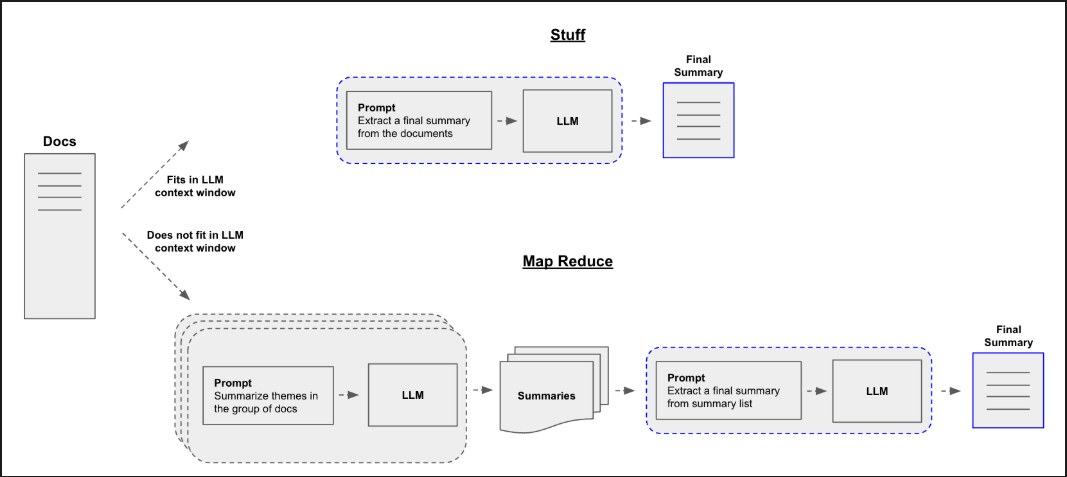

In [17]:
from langchain_community.document_loaders import PyPDFLoader

loader=PyPDFLoader('apjspeech.pdf')
docs=loader.load()
docs

[Document(metadata={'source': 'apjspeech.pdf', 'page': 0}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those living abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowin

In [18]:
template=""""

    write a consice and short summary of the following speech , 
    speech : {text}

"""

prompt= PromptTemplate(input_variabe=["text"] ,
                       template=template)


In [20]:
from langchain.chains.summarize import load_summarize_chain

chain=load_summarize_chain(llm , chain_type="stuff" , prompt=prompt , verbose=True)
output_summary=chain.run(docs)
output_summary



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
"

    write a consice and short summary of the following speech , 
    speech : A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those living abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through m

'In his departing speech as President of India, A.P.J. Abdul Kalam summarizes the valuable lessons and experiences gained during his tenure. He emphasizes the importance of accelerating development, empowering villages, and mobilizing rural core competence for competitiveness. He also highlights the need for a "Seed to Food" approach for agricultural growth, and the significance of defeating problems through partnership and courage in combating calamities. Furthermore, he promotes connectivity for societal transformation, defending the nation, and inspiring a youth movement for a Developed India 2020. He expresses gratitude to the citizens for their love and support, and reaffirms his commitment to the mission of making India a developed nation before 2020.'

## **Technique 4**
## **Map Reduce Summarize Large Documents**


In [21]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [22]:
docs

[Document(metadata={'source': 'apjspeech.pdf', 'page': 0}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those living abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowin

In [23]:
text_splitter=RecursiveCharacterTextSplitter(chunk_size=2000 , chunk_overlap=100)
final_split=text_splitter.split_documents(docs)
final_split

[Document(metadata={'source': 'apjspeech.pdf', 'page': 0}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those living abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowin

In [24]:
len(final_split)

13

In [25]:
chunk_prompt="""
Please summarize the below speech :
Speech:{text}
Summary:

"""


map_prompt_template=PromptTemplate(input_variable=['text'] ,
                                   template=chunk_prompt)

In [26]:
final_prompt="""
provide the final summary of the entire speech with these important points .
Add a motivational Title , Start the precise summary with an introduction and provide the summary in number points
for the speech.
Speech : {text}

"""

final_prompt_template=PromptTemplate(input_variable=["text"] , 
                                     template=final_prompt)

In [28]:
final_chain=load_summarize_chain(
    llm=llm,
    chain_type='map_reduce',
    map_prompt=map_prompt_template,
    combine_prompt=final_prompt_template, 
    verbose=True
)

In [29]:
output=final_chain.run(final_split)



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:

Please summarize the below speech :
Speech:A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those living abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online interactions, I have ma

Token indices sequence length is longer than the specified maximum sequence length for this model (2114 > 1024). Running this sequence through the model will result in indexing errors



> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

provide the final summary of the entire speech with these important points .
Add a motivational Title , Start the precise summary with an introduction and provide the summary in number points
for the speech.
Speech : In his departing speech, former President of India, A.P.J. Abdul Kalam, expresses his gratitude for the opportunity to serve the country for five eventful years. He shares ten important messages that he has gathered from his interactions with people from various walks of life. The messages include accelerating development, empowering villages, mobilizing rural core competence for competitiveness, focusing on agricultural growth, defeating problems and succeeding, overcoming problems through partnership, showing courage in combating calamities, promoting connectivity for societal transformation, defending the nation with pride, and encouraging a youth movement for Developed India 2020. The messa

In [31]:
print(output)

Title: "Developing a Prosperous and Empowered India by 2


## **Technique 5**
## **Refine Chain Summary**

In [36]:
final_chain_refine=load_summarize_chain(
    llm=llm,
    chain_type='refine',
    verbose=True
)

In [37]:
final_chain_refine.run(final_split)



> Entering new RefineDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those living abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online interactions, I have many

'In his farewell speech, former President of India, A.P.J. Abdul Kalam, expresses gratitude for his tenure and shares key messages derived from his experiences with various communities. He emphasizes the need to accelerate development, specifically addressing the aspirations of the youth to live in a prosperous, safe, and proud India. Kalam highlights the significant strides made in rural development through the PERIYAR PURA model, which has transformed 200 acres of waste land into cultivable land and empowered 1000 self-help groups to generate employment and create entrepreneurs. The PURA model has enabled the development of internationally competitive lifestyle products, enhancing the innovative ability of the rural populace. Kalam advocates for the establishment of 7000 such PURA models to bridge the rural-urban divide and foster agricultural growth, with a goal of increasing agricultural GDP growth by at least 4% per annum.\n\nKalam encourages addressing problems with a positive mi